In [23]:
import time
import requests
from datetime import datetime

import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt

In [48]:
def read(n: int = 5, t: int = 10, average: bool = True):

    params = {'n': n, 't': t}
    x = requests.get('http://192.168.1.125/read', params=params)
    
    if x.status_code == 200:
        json = x.json()
        if average:
            for k, v in json.items():
                v = [val for val in v if val is not None]
                json[k] = np.mean(v) if len(v) > 0 else np.nan

        json['time'] = datetime.now()
        return json
    else:
        return None

def normalize(x, v_min=1000, v_max=2500):
    x = min(max(x, v_min), v_max)
    return (x - v_min) / (v_max - v_min)

def moving_average(x, w=10):
    return np.convolve(x, np.ones(w), 'valid') / w

In [49]:
read(n=5, t=10, average=False)

{'temperature': [22.8, 22.8, 22.8, 22.8, 22.8],
 'humidity': [48.7, 48.7, 48.7, 48.7, 48.7],
 'moisture': [1840, 1842, 1834, 1831, 1831],
 'time': datetime.datetime(2021, 6, 30, 22, 4, 16, 273085)}

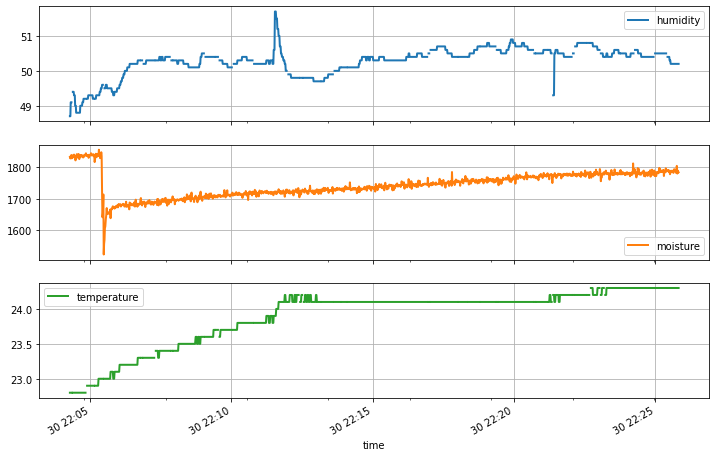

      humidity  moisture  temperature                       time
1597      50.2    1804.4         24.3 2021-06-30 22:25:46.381863
1598      50.2    1780.0         24.3 2021-06-30 22:25:47.405455
1599      50.2    1789.2         24.3 2021-06-30 22:25:48.337594
1600      50.2    1786.4         24.3 2021-06-30 22:25:49.248661
1601      50.2    1784.0         24.3 2021-06-30 22:25:50.171289


In [ ]:
data = pd.DataFrame()

while True:
    display.clear_output(wait=True)
    json = read()
    data = data.append(json, ignore_index=True)
    data.plot(x='time', subplots=True, layout=(3, 1), figsize=(12, 8), grid=True, linewidth=2)
    plt.show()
    print(data.tail())